In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()


In [212]:
#import data from raspberry pi
import os
os.system("./get_data.sh")

200K	rtaml_log.txt
Raspberry Pi Logs Updated *******


0

In [213]:
columns = ['time', '1','2','id','type','crc1','crc2','consumption','crc3']
df = pd.read_csv("rtaml_log.txt",header=None,parse_dates=[0])


In [214]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [215]:
df = df.rename(columns={0:'datetime',7:'consumption',3:'id'})


In [216]:
df_other = df[df.id=='0x16a3']
df_other = df_other.rename(columns={0:'datetime',7:'consumption','id':3,6:'id'})
df_other.tail()
df = df[df.id!='0x16a3']

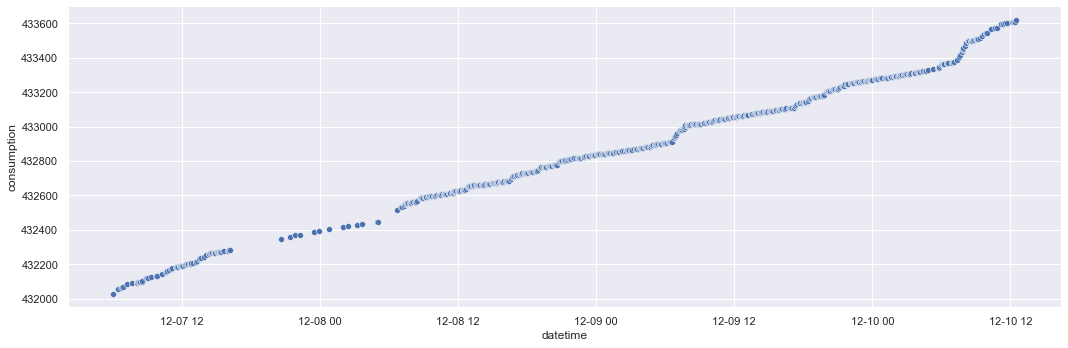

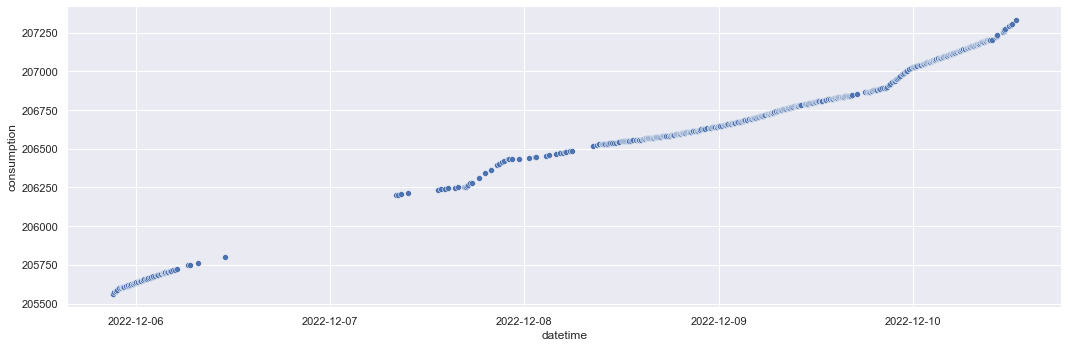

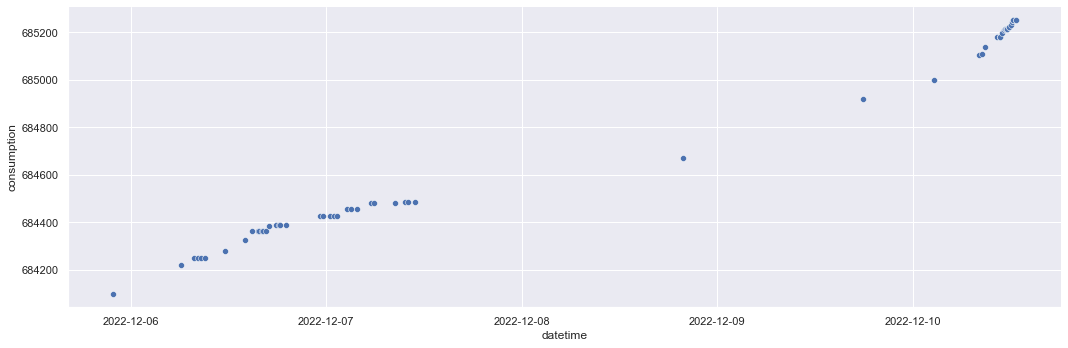

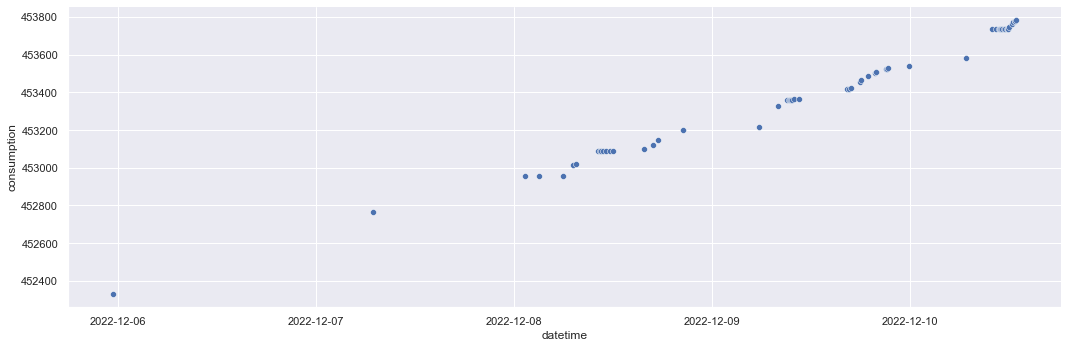

In [217]:
## only plot a few items
id_dict = dict(df.id.value_counts())

for i,k in enumerate(id_dict.keys()):
    if i>3: break
        
    temp_df = df[df.id == k]
    rel = sns.relplot(data = temp_df.tail(800) , x='datetime',y='consumption',aspect=3)

In [218]:
df_other.tail()

,datetime,1,2,3,4,5,id,consumption,8,9
2685,2022-12-10 12:50:34.780931147-05:00,0,0,0x16a3,0x1e,0x9c,77714438,85172,0x0,0x1cab
2686,2022-12-10 12:50:36.289552257-05:00,0,0,0x16a3,0x1e,0x9c,98759830,289282,0x908,0xa2d6
2687,2022-12-10 12:50:36.719191499-05:00,0,0,0x16a3,0x1e,0x9c,75402505,871496,0x808,0x3a57
2688,2022-12-10 12:50:37.047471095-05:00,0,0,0x16a3,0x1e,0x9c,75398176,83652,0x808,0xd888
2689,2022-12-10 12:50:39.842942112-05:00,0,0,0x16a3,0x1e,0x9c,75398145,501484,0x808,0x6817


In [219]:
df_other.id.value_counts()

98759830    27
75402505    27
77714438    23
75398176    23
78083635    23
76356776    21
75395267    21
98759829    20
75397762    20
75402447    19
75398147    16
78894353    16
77963329    15
76197353    14
75403318    13
75398174    11
75398145    11
75398149    11
76628811    10
98493546     9
98759971     7
78037847     7
76526473     5
98759807     4
98759837     2
98759836     1
78037831     1
76704364     1
99041203     1
Name: id, dtype: int64

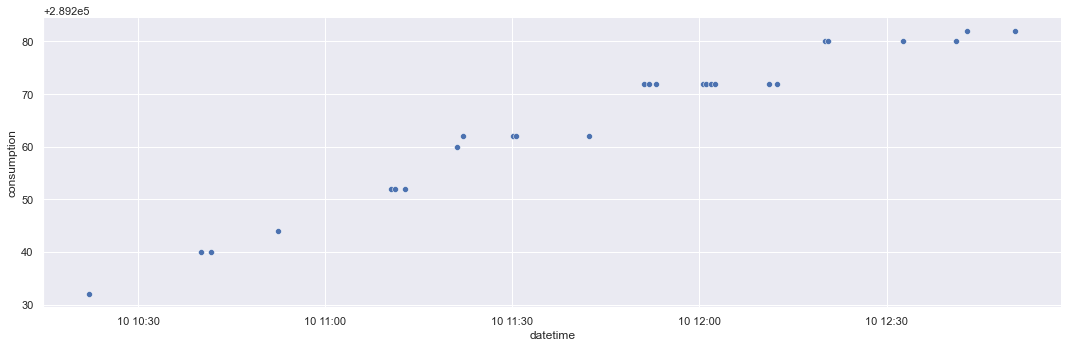

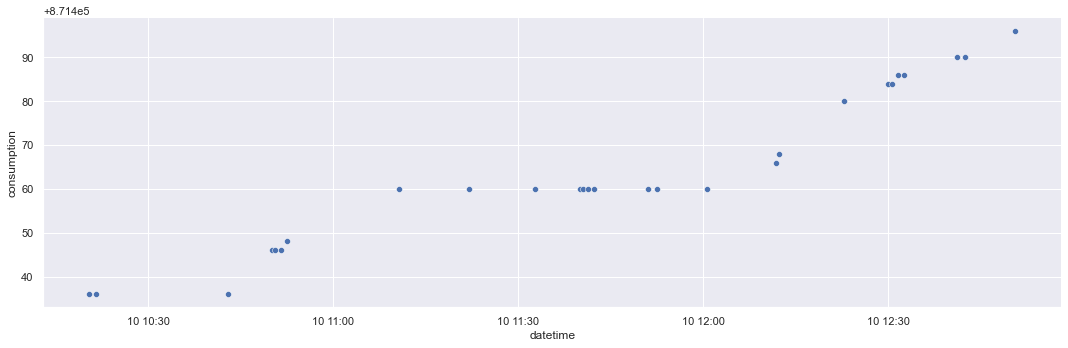

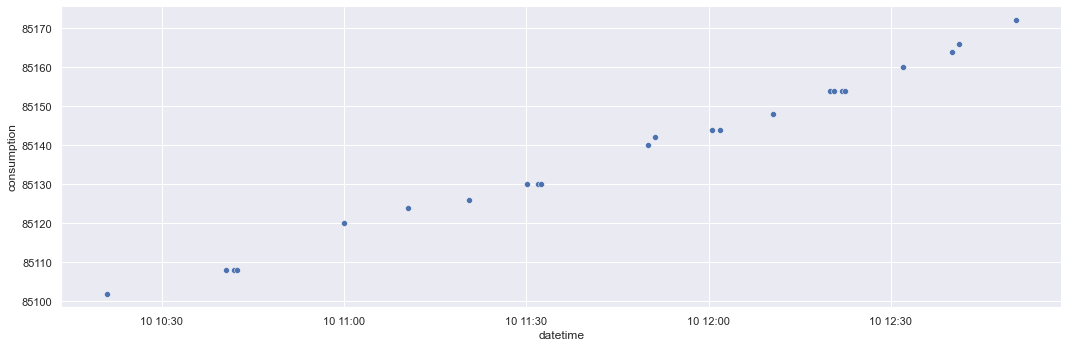

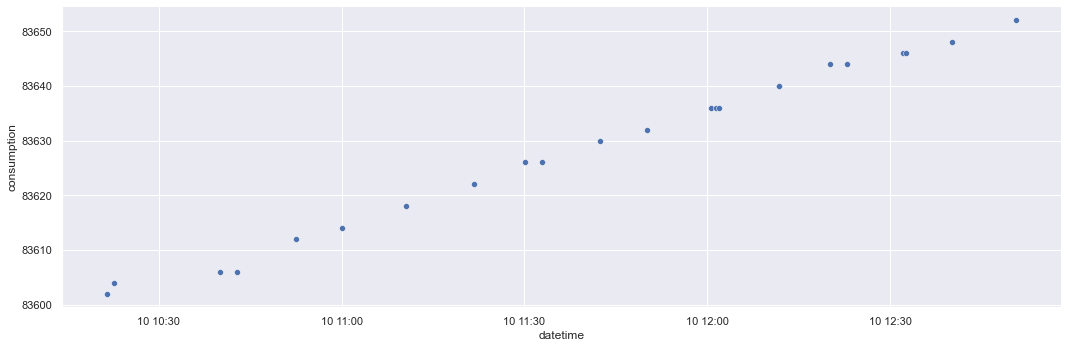

In [220]:
## only plot a few items
id_dict = dict(df_other.id.value_counts())

for i,k in enumerate(id_dict.keys()):
    if i>3: break
        
    temp_df = df_other[df_other.id == k]
    rel = sns.relplot(data = temp_df , x='datetime',y='consumption',aspect=3)